<a href="https://colab.research.google.com/github/kelseymatsik/ds4002_project2/blob/main/Project2EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
crime = pd.read_csv('/content/Crime_Data.csv')
crime.describe()

,RecordID,IncidentID,BlockNumber,HourReported
count,25111.000000,2.511100e+04,23322.000000,25111.000000
mean,12556.000000,2.021956e+11,883.440528,1346.739755
std,7249.065641,1.517163e+08,631.204242,586.961422
min,1.000000,2.019000e+11,100.000000,0.000000
25%,6278.500000,2.021000e+11,400.000000,958.000000
50%,12556.000000,2.022000e+11,800.000000,1403.000000
75%,18833.500000,2.023000e+11,1300.000000,1809.000000
max,25111.000000,2.024800e+11,6400.000000,2359.000000


In [36]:
crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Assist Citizen - Mental/TDO/ECO,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024/10/02 00:24:02+00,2024,"Venereo, Arturo"
1,2,Larceny - Of Veh Parts/Access,202400034075,1600.0,"6TH ST SE, 28",CPD,2024/10/01 21:38:47+00,1738,"Kirby, Tyree"
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024/10/01 21:11:45+00,1711,"Bland, Johnnà"
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024/10/01 20:59:17+00,1659,"Prevost, Payten"
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024/10/01 18:23:15+00,1423,"Brannon, Devin"


In [37]:
crime['Offense'].value_counts()

,count
Offense,
Hit and Run,2167
Assault Simple,1911
Suspicious Activity,1693
Vandalism,1627
Larceny - From Motor Vehicle,1554
...,...
Traffic - Traffic Hazard,1
Stop w/o Search/Frisk,1
Prostitution,1


In [38]:
crime['Offense'] = crime['Offense'].str.replace(r'.*Larceny.*', 'Larceny', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Assist Citizen.*', 'Assist Citizen', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Sex Offense.*', 'Sex Offense', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Fraud.*', 'Fraud', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Accident.*', 'Accident', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Robbery.*', 'Robbery', regex=True)
crime['Offense']= crime['Offense'].str.replace(r'.*Traffic.*', 'Traffic', regex=True)

In [40]:
crime['Offense'].value_counts()

,count
Offense,
Larceny,5347
Hit and Run,2167
Assault Simple,1911
Suspicious Activity,1693
Vandalism,1627
...,...
911 Investigation,1
Tactical Crime Initiative - TCI,1
Stop w/o Search/Frisk,1


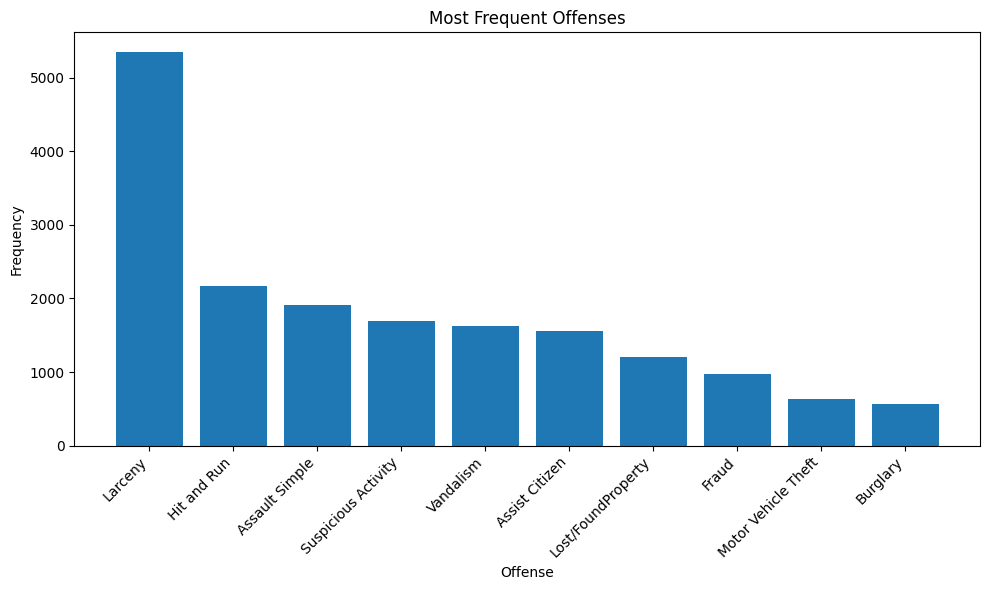

In [46]:
import matplotlib.pyplot as plt

# Count the frequency of each offense
offense_counts = crime['Offense'].value_counts().nlargest(10)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(offense_counts.index, offense_counts.values)
plt.xlabel("Offense")
plt.ylabel("Frequency")
plt.title("Most Frequent Offenses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()